Realizado por Francisco Espinoza, Paulina Duque y Constanza Rios

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels import robust
%matplotlib inline

In [6]:
Datos=pd.read_csv("C:/Users/fcoes/Downloads/applemobilitytrends-2021-12-09.csv") #Obtención de datos

C:\Users\fcoes\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
Datos

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2021-11-30,2021-12-01,2021-12-02,2021-12-03,2021-12-04,2021-12-05,2021-12-06,2021-12-07,2021-12-08,2021-12-09
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,...,152.35,151.20,141.39,163.52,172.67,162.12,156.23,150.23,171.58,159.52
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,181.32,224.26,210.36,215.39,214.93,156.72,191.94,208.66,244.65,203.88
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,93.26,100.08,104.56,135.03,146.15,91.97,97.89,128.10,98.74,115.38
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,...,94.21,99.95,103.63,125.52,123.87,71.43,102.94,122.42,84.15,114.29
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,...,128.27,130.51,135.67,143.79,113.66,121.15,124.25,128.52,138.88,146.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4686,county,York County,walking,NaN,Pennsylvania,United States,100.0,110.22,121.82,109.72,...,200.06,200.28,204.75,242.15,245.19,157.62,197.62,186.69,191.71,197.18
4687,county,Young County,driving,NaN,Texas,United States,100.0,98.85,97.76,92.21,...,160.43,133.94,163.62,270.80,177.71,133.40,164.36,166.46,176.96,179.00
4688,county,Yuba County,driving,NaN,California,United States,100.0,102.98,103.10,114.08,...,160.95,170.27,164.70,201.53,190.09,132.93,155.47,168.96,169.29,168.30
4689,county,Yuma County,driving,NaN,Arizona,United States,100.0,101.82,106.67,108.93,...,146.23,149.87,149.14,179.34,158.87,125.10,151.27,156.07,157.59,160.94


In [36]:
Datos1=Datos[Datos["geo_type"]=="country/region"]
Datos1.drop(["alternative_name","sub-region","country","geo_type",],axis=1,inplace=True)
DatosGeo

C:\Users\fcoes\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2021-11-30,2021-12-01,2021-12-02,2021-12-03,2021-12-04,2021-12-05,2021-12-06,2021-12-07,2021-12-08,2021-12-09
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,...,152.35,151.20,141.39,163.52,172.67,162.12,156.23,150.23,171.58,159.52
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,181.32,224.26,210.36,215.39,214.93,156.72,191.94,208.66,244.65,203.88
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,93.26,100.08,104.56,135.03,146.15,91.97,97.89,128.10,98.74,115.38
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,...,94.21,99.95,103.63,125.52,123.87,71.43,102.94,122.42,84.15,114.29
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,...,128.27,130.51,135.67,143.79,113.66,121.15,124.25,128.52,138.88,146.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,country/region,United States,walking,USA,NaN,NaN,100.0,99.59,101.87,100.60,...,142.73,151.78,158.66,205.96,232.39,145.03,143.51,146.44,150.56,160.56
149,country/region,Uruguay,driving,NaN,NaN,NaN,100.0,96.84,92.90,103.48,...,85.98,90.18,91.12,124.98,145.29,85.88,92.31,100.00,100.07,102.66
150,country/region,Uruguay,walking,NaN,NaN,NaN,100.0,94.90,78.04,100.46,...,98.29,102.14,102.63,125.87,131.05,67.79,100.52,122.10,111.20,112.91
151,country/region,Vietnam,driving,Việt Nam,NaN,NaN,100.0,104.96,108.67,107.09,...,92.20,92.38,92.24,99.93,109.52,100.29,93.76,95.12,97.06,97.75


In [40]:
Datos_chi=Datos1[Datos1["region"]=="Chile"]
Datos_chi

,region,transportation_type,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,...,2021-11-30,2021-12-01,2021-12-02,2021-12-03,2021-12-04,2021-12-05,2021-12-06,2021-12-07,2021-12-08,2021-12-09
22,Chile,driving,100.0,99.01,102.57,106.47,124.69,120.83,97.12,102.53,...,109.32,114.46,115.37,158.26,153.99,106.04,118.25,137.21,112.95,137.00
23,Chile,walking,100.0,102.58,103.13,103.74,107.87,86.73,59.44,99.53,...,116.08,123.24,122.84,151.82,132.18,79.77,129.48,144.41,95.62,144.52


In [41]:
Datos_unidos=Datos_chi.melt(id_vars=["region","transportation_type"],var_name="fecha")
Datos_unidos

,region,transportation_type,fecha,value
0,Chile,driving,2020-01-13,100.00
1,Chile,walking,2020-01-13,100.00
2,Chile,driving,2020-01-14,99.01
3,Chile,walking,2020-01-14,102.58
4,Chile,driving,2020-01-15,102.57
...,...,...,...,...
1389,Chile,walking,2021-12-07,144.41
1390,Chile,driving,2021-12-08,112.95
1391,Chile,walking,2021-12-08,95.62
1392,Chile,driving,2021-12-09,137.00


In [42]:
Datos_unidos["fecha"]=pd.to_datetime(Datos_unidos["fecha"])  #Convierte argumento fecha en Datatime

In [43]:
df = pd.DataFrame(Datos_unidos["fecha"])
df['mes'] = pd.DatetimeIndex(df['fecha']).month
df['Medio de transporte'] = Datos_unidos["transportation_type"]
df['Valores'] = Datos_unidos["value"]

In [44]:
df

,fecha,mes,Medio de transporte,Valores
0,2020-01-13,1,driving,100.00
1,2020-01-13,1,walking,100.00
2,2020-01-14,1,driving,99.01
3,2020-01-14,1,walking,102.58
4,2020-01-15,1,driving,102.57
...,...,...,...,...
1389,2021-12-07,12,walking,144.41
1390,2021-12-08,12,driving,112.95
1391,2021-12-08,12,walking,95.62
1392,2021-12-09,12,driving,137.00


In [45]:
Walking=df[df["Medio de transporte"]=="walking"]

In [46]:
Driving=df[df["Medio de transporte"]=="driving"]

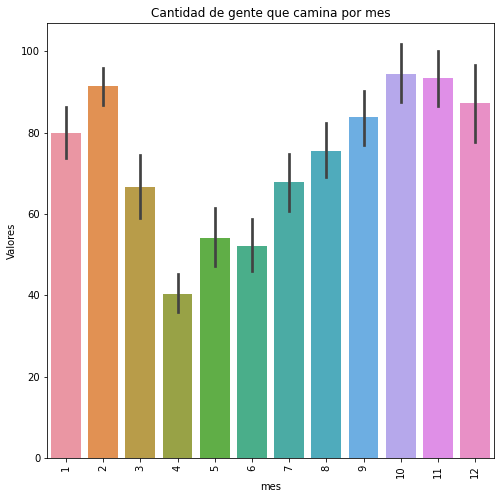

In [56]:
plt.rcParams["figure.figsize"] = (8, 8)
plt.xticks(rotation='vertical')
sns.barplot(x="mes", y="Valores",data=Walking).set_title("Cantidad de gente que camina por mes")
plt.show()

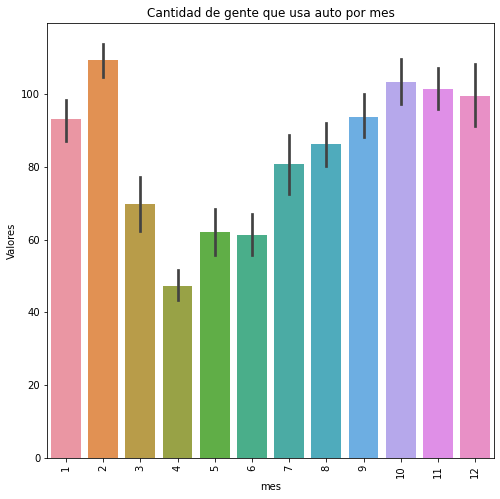

In [57]:
plt.rcParams["figure.figsize"] = (8, 8)
plt.xticks(rotation='vertical')
sns.barplot(x="mes", y="Valores",data=Driving).set_title("Cantidad de gente que usa auto por mes")
plt.show()

Conclusión: A simple vista se puede apreciar que la movilidad en general tanto caminando como en automovil segue el mismo patron
producto de las cuarentenas y al re brote del virus entre el mes de marzo y junio se vio una baja de movilidad general en consecuencia.
Este ultimo año las personas se trasladaban mayormente en auto, pero no se sabe con exactitud si es debido a la crisis sanitaria.

In [29]:
Datos2 = pd.read_csv("C:/Users/fcoes/Downloads/Global_Mobility_Report.csv") #Obtención de datos
Datos2_chi=Datos2[Datos2["country_region"]=="Chile"]
Datos2_chi.drop(["country_region_code","sub_region_1","sub_region_2","iso_3166_2_code","census_fips_code","place_id","retail_and_recreation_percent_change_from_baseline","metro_area","grocery_and_pharmacy_percent_change_from_baseline","transit_stations_percent_change_from_baseline","workplaces_percent_change_from_baseline","residential_percent_change_from_baseline"],axis=1,inplace=True)

C:\Users\fcoes\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [30]:
print(Datos2_chi)

        country_region        date  parks_percent_change_from_baseline
2203786          Chile  2020-02-15                                 9.0
2203787          Chile  2020-02-16                                 5.0
2203788          Chile  2020-02-17                                11.0
2203789          Chile  2020-02-18                                13.0
2203790          Chile  2020-02-19                                11.0
...                ...         ...                                 ...
2250415          Chile  2021-12-03                               -16.0
2250416          Chile  2021-12-04                               -25.0
2250417          Chile  2021-12-05                               -29.0
2250418          Chile  2021-12-06                               -27.0
2250419          Chile  2021-12-07                               -19.0

[46634 rows x 3 columns]


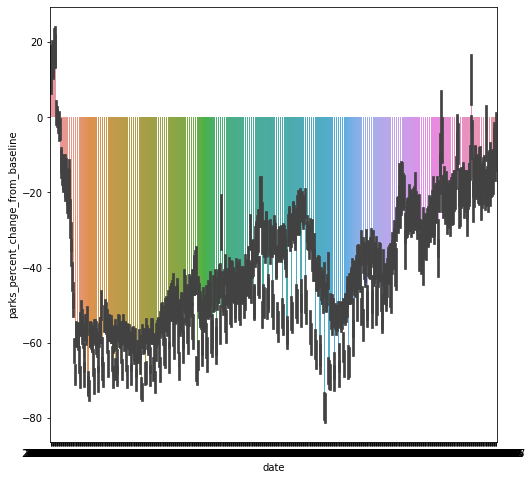

In [31]:
sns.barplot(x="date", y="parks_percent_change_from_baseline",data=Datos2CHL)
plt.show()

Grafico indica las variaciones de visitas a parques en chile durante 2021 segun las fecha, concluyendo que que un principio de 
este año hubo un pequeño aumento (producto de festividades y que las personas salieron más a las calles) pero con el paso
del tiempo este porcentaje de uso de parque fue aumentando lentamente.